In [2]:
# import data
import pandas as pd

train = pd.read_csv('train.csv')

In [27]:
# how is our data generally look like?
pd.options.display.max_colwidth = 50
print(train.iloc[0:10,])

                    qid                                      question_text  target
0  00002165364db923c7e6  How did Quebec nationalists see their province...       0
1  000032939017120e6e44  Do you have an adopted dog, how would you enco...       0
2  0000412ca6e4628ce2cf  Why does velocity affect time? Does velocity a...       0
3  000042bf85aa498cd78e  How did Otto von Guericke used the Magdeburg h...       0
4  0000455dfa3e01eae3af  Can I convert montra helicon D to a mountain b...       0
5  00004f9a462a357c33be  Is Gaza slowly becoming Auschwitz, Dachau or T...       0
6  00005059a06ee19e11ad  Why does Quora automatically ban conservative ...       0
7  0000559f875832745e2e  Is it crazy if I wash or wipe my groceries off...       0
8  00005bd3426b2d0c8305  Is there such a thing as dressing moderately, ...       0
9  00006e6928c5df60eacb  Is it just me or have you ever been in this ph...       0


In [12]:
print(train.shape)

(1306122, 3)


In [19]:
# what does toxic text look like?
toxic_train = train[train['target']==1]

In [24]:
pd.options.display.max_colwidth = 100
print(toxic_train['question_text'][0:10])

22                                     Has the United States become the largest dictatorship in the world?
30                  Which babies are more sweeter to their parents? Dark skin babies or light skin babies?
110    If blacks support school choice and mandatory sentencing for criminals why don't they vote Repub...
114    I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and ...
115                                                                   Which races have the smallest penis?
119                                                                      Why do females find penises ugly?
127                            How do I marry an American woman for a Green Card? How much do they charge?
144    Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until...
156    Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?
167    In what manner has Republican 

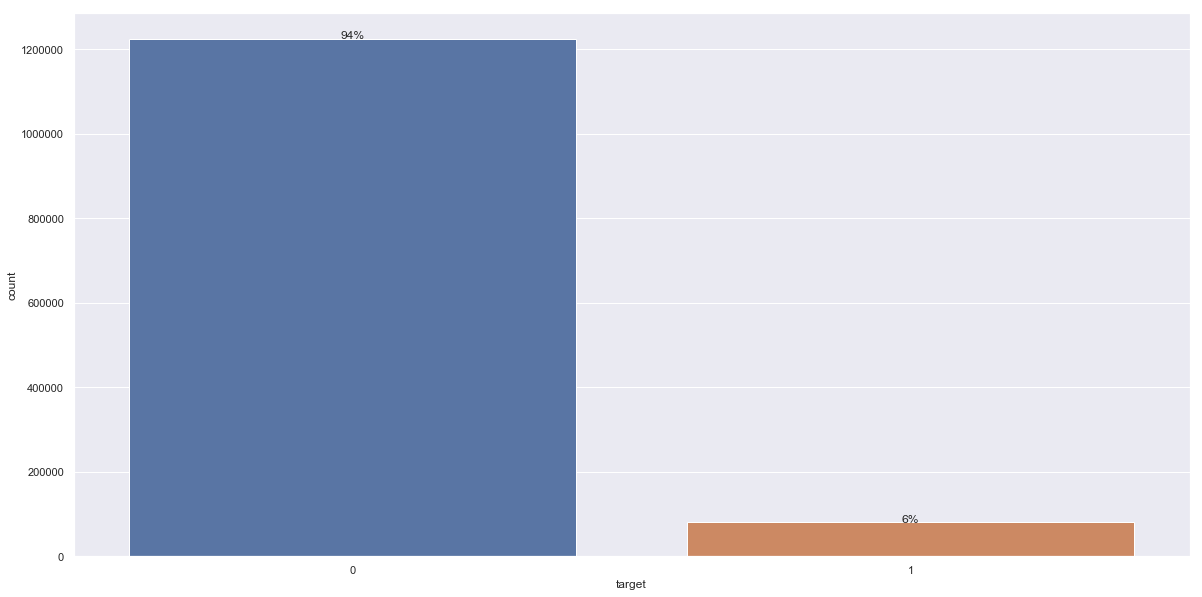

In [51]:
# ratio of toxic text?
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,10)})

ax = sns.countplot(x='target', data=train)
total = train.shape[0]
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{0:.0%}'.format(height/total),
            ha="center") 
plt.show()

In [ ]:
# length of text? max, min, distribution?

In [32]:
# simple word count for toxic text and non-toxic text
non_toxic_train = train[train['target'] == 0]
non_toxic_train.shape

(1225312, 3)

In [33]:
toxic_train.shape

(80810, 3)

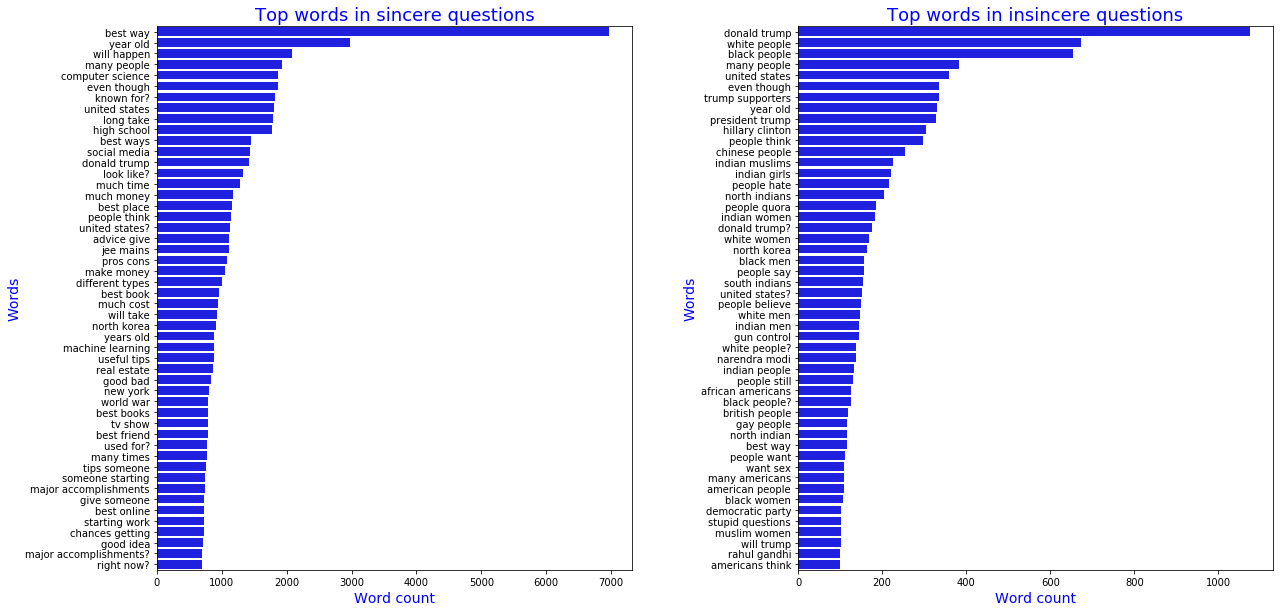

In [41]:
# reference: 
# https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc
# https://www.kaggle.com/arunsankar/key-insights-from-quora-insincere-questions

from collections import defaultdict
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
stopwords = stopwords.union(more_stopwords)

def ngram_extractor(text, n_gram):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Function to generate a dataframe with n_gram and top max_row frequencies
def generate_ngrams(df, col, n_gram, max_row):
    temp_dict = defaultdict(int)
    for question in df[col]:
        for word in ngram_extractor(question, n_gram):
            temp_dict[word] += 1
    temp_df = pd.DataFrame(sorted(temp_dict.items(), key=lambda x: x[1])[::-1]).head(max_row)
    temp_df.columns = ["word", "wordcount"]
    return temp_df

def comparison_plot(df_1,df_2,col_1,col_2, space):
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    
    sns.barplot(x=col_2, y=col_1, data=df_1, ax=ax[0], color="blue")
    sns.barplot(x=col_2, y=col_1, data=df_2, ax=ax[1], color="blue")

    ax[0].set_xlabel('Word count', size=14, color="blue")
    ax[0].set_ylabel('Words', size=14, color="blue")
    ax[0].set_title('Top words in sincere questions', size=18, color="blue")

    ax[1].set_xlabel('Word count', size=14, color="blue")
    ax[1].set_ylabel('Words', size=14, color="blue")
    ax[1].set_title('Top words in insincere questions', size=18, color="blue")

    fig.subplots_adjust(wspace=space)
    
    plt.show()
    
sincere_2gram = generate_ngrams(non_toxic_train, 'question_text', 2, 50)
insincere_2gram = generate_ngrams(toxic_train, 'question_text', 2, 50)

comparison_plot(sincere_2gram,insincere_2gram,'word','wordcount', .35)